In [1]:
from ubm.plotting import get_range
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_column(gdf, day_column="day_parking_plot", suptitle: str = f"Title", ticks: list = None):
    """
    Plot Day and Night Data of the GeoDataFrame.

    Parameters
    ----------
    gdf: GeoDataFrame
        GeoDataFrame augmented with car parked data.
    vehicle_type: str
        Type of vehicle to use in the title of the plot.
    day_column: str
        Name of the column to use as Day
    night_column: str
        Name of the column to use as Night

    """
    os.makedirs('./img', exist_ok=True)
    fig, ax0 = plt.subplots(1, 1, figsize=(10, 10), dpi=300)
    fig.suptitle(suptitle, fontsize=20)
    gdf.plot(column=day_column, legend=True, vmax=np.max(ticks),cmap=plt.get_cmap('Oranges'), edgecolor='#862a04',
                  linewidth=0.2, ax=ax0, legend_kwds={'ticks': ticks})
    ax0.axis("off")
    plt.xticks(ticks=[], labels=[])
    plt.yticks(ticks=[], labels=[])
    plt.tight_layout()
    plt.savefig(f"{day_column}.png", dpi=300)
    return fig

In [2]:
cars_0 = pd.read_csv("./out/s0/n_cars_mean_5000it_7d.csv", header=None).loc[:, 8]
power_0 = pd.read_csv("./out/s0/power_kw_mean_5000it_7d.csv", header=None ).loc[:, 8]
cars_3 = pd.read_csv("./out/s3/n_cars_mean_5000it_7d.csv", header=None).loc[:, 8]
power_3 = pd.read_csv("./out/s3/power_kw_mean_5000it_7d.csv", header=None ).loc[:, 8]

In [3]:
from ubm.zoning import shapefile_path_to_geodataframe

gdf = shapefile_path_to_geodataframe('torino_5T.zip')
gdf['cars_0'] = np.round(cars_0, 0).astype(int)
gdf['power_0'] = np.round(power_0, 0).astype(int)
gdf['cars_3'] = np.round(cars_3, 0).astype(int)
gdf['power_3'] = np.round(power_3, 0).astype(int)

In [4]:
max_value_cars = np.max([np.max(gdf['cars_0']), np.max(gdf['cars_3'])])
ticks_cars = np.append(np.arange(0, int(max_value_cars)), max_value_cars)
max_value_power = np.max([np.max(gdf['power_0']), np.max(gdf['power_3'])])
ticks_power = np.append(np.arange(0, int(max_value_power)), max_value_power)

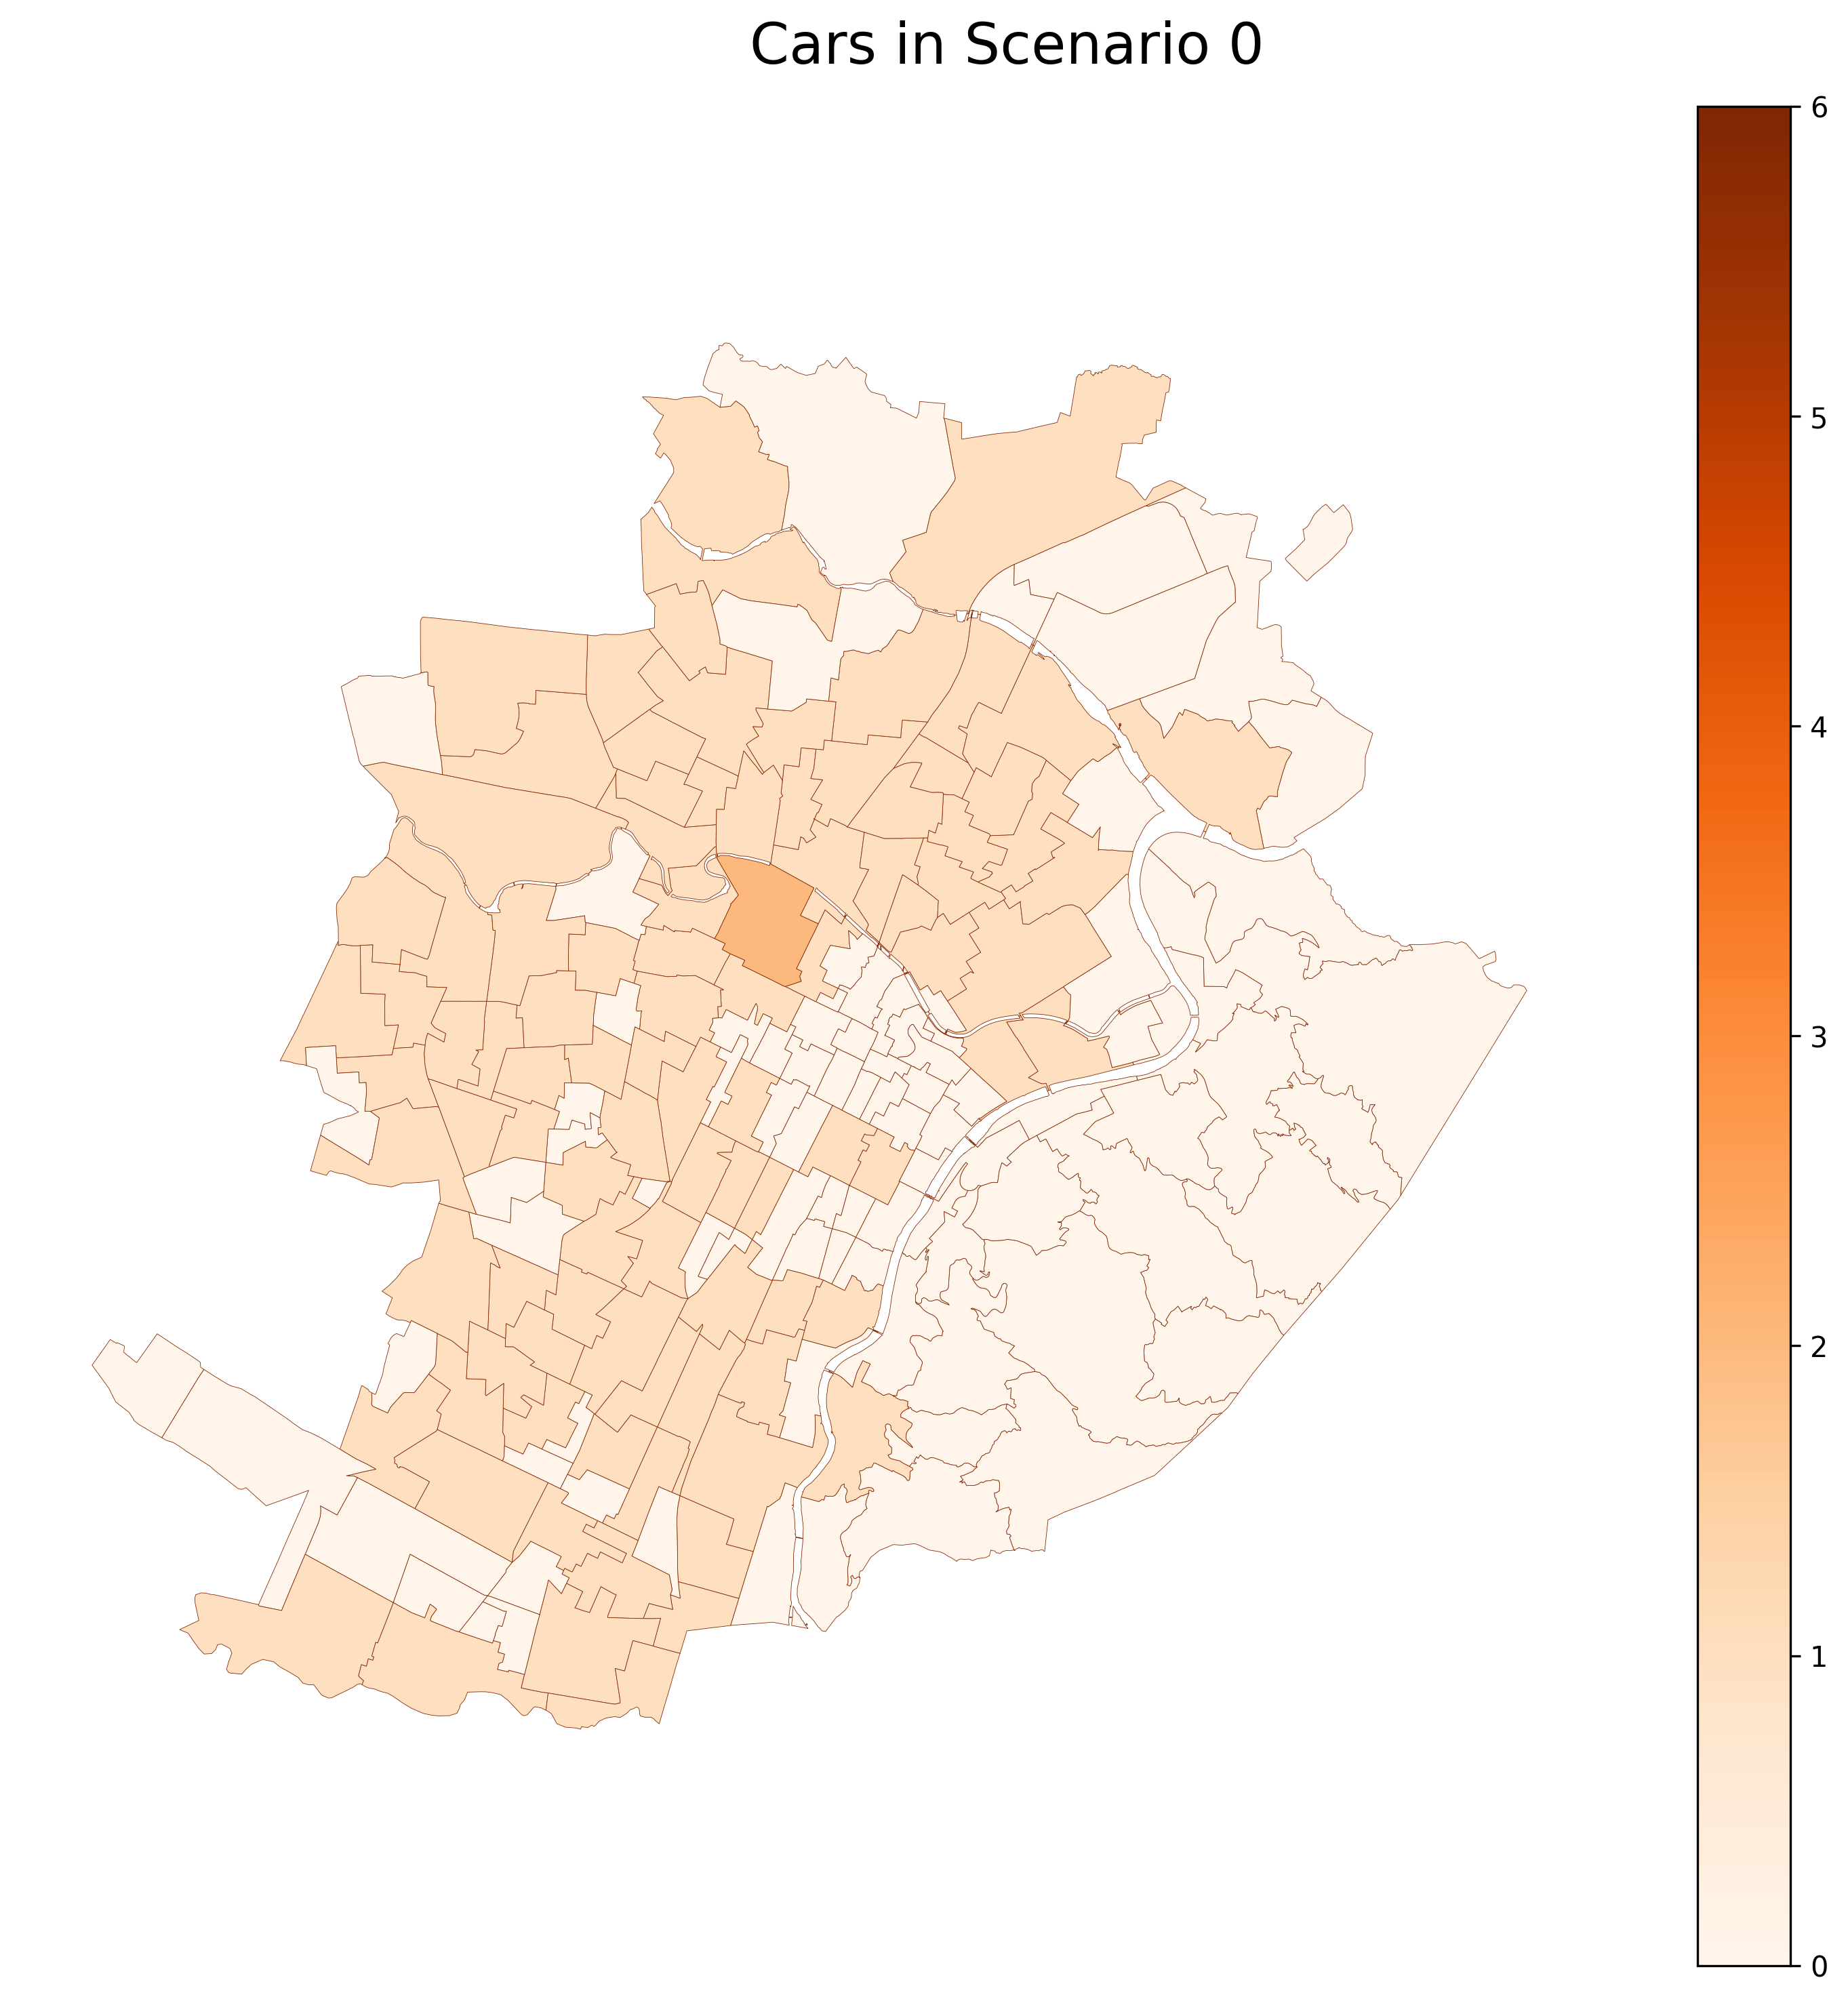

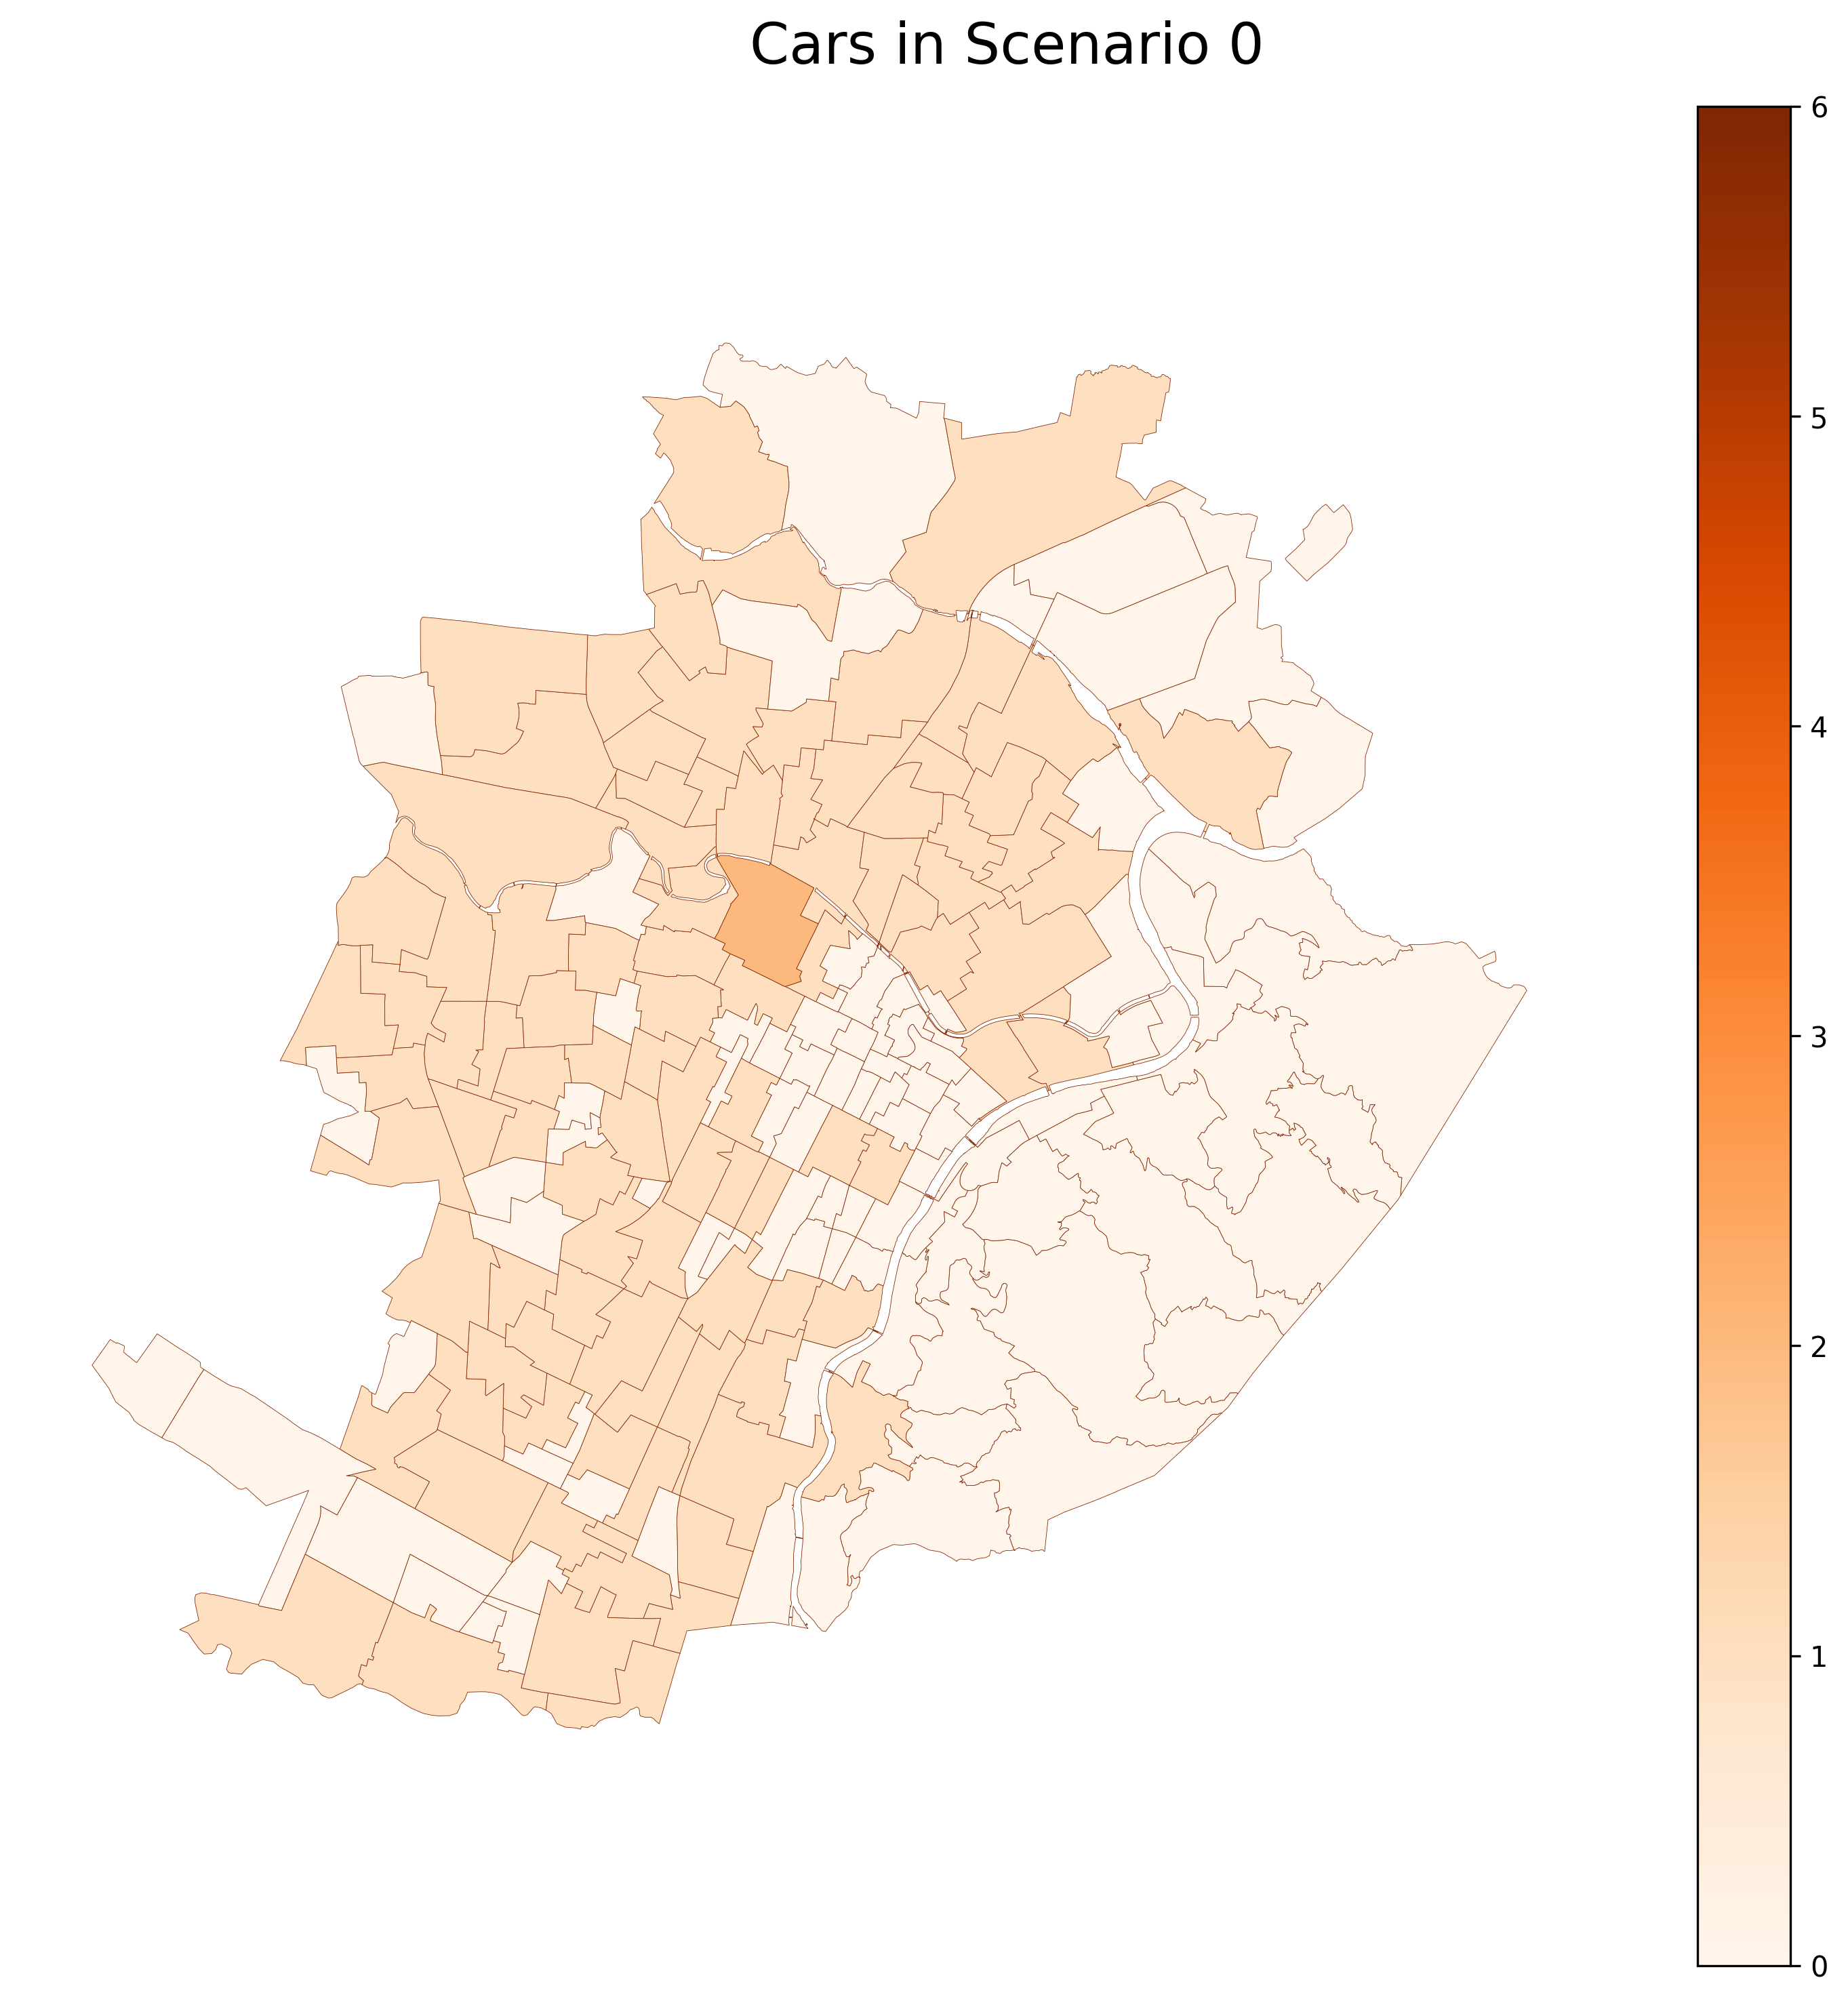

In [5]:
plot_column(gdf, day_column="cars_0",suptitle="Cars in Scenario 0", ticks=ticks_cars)

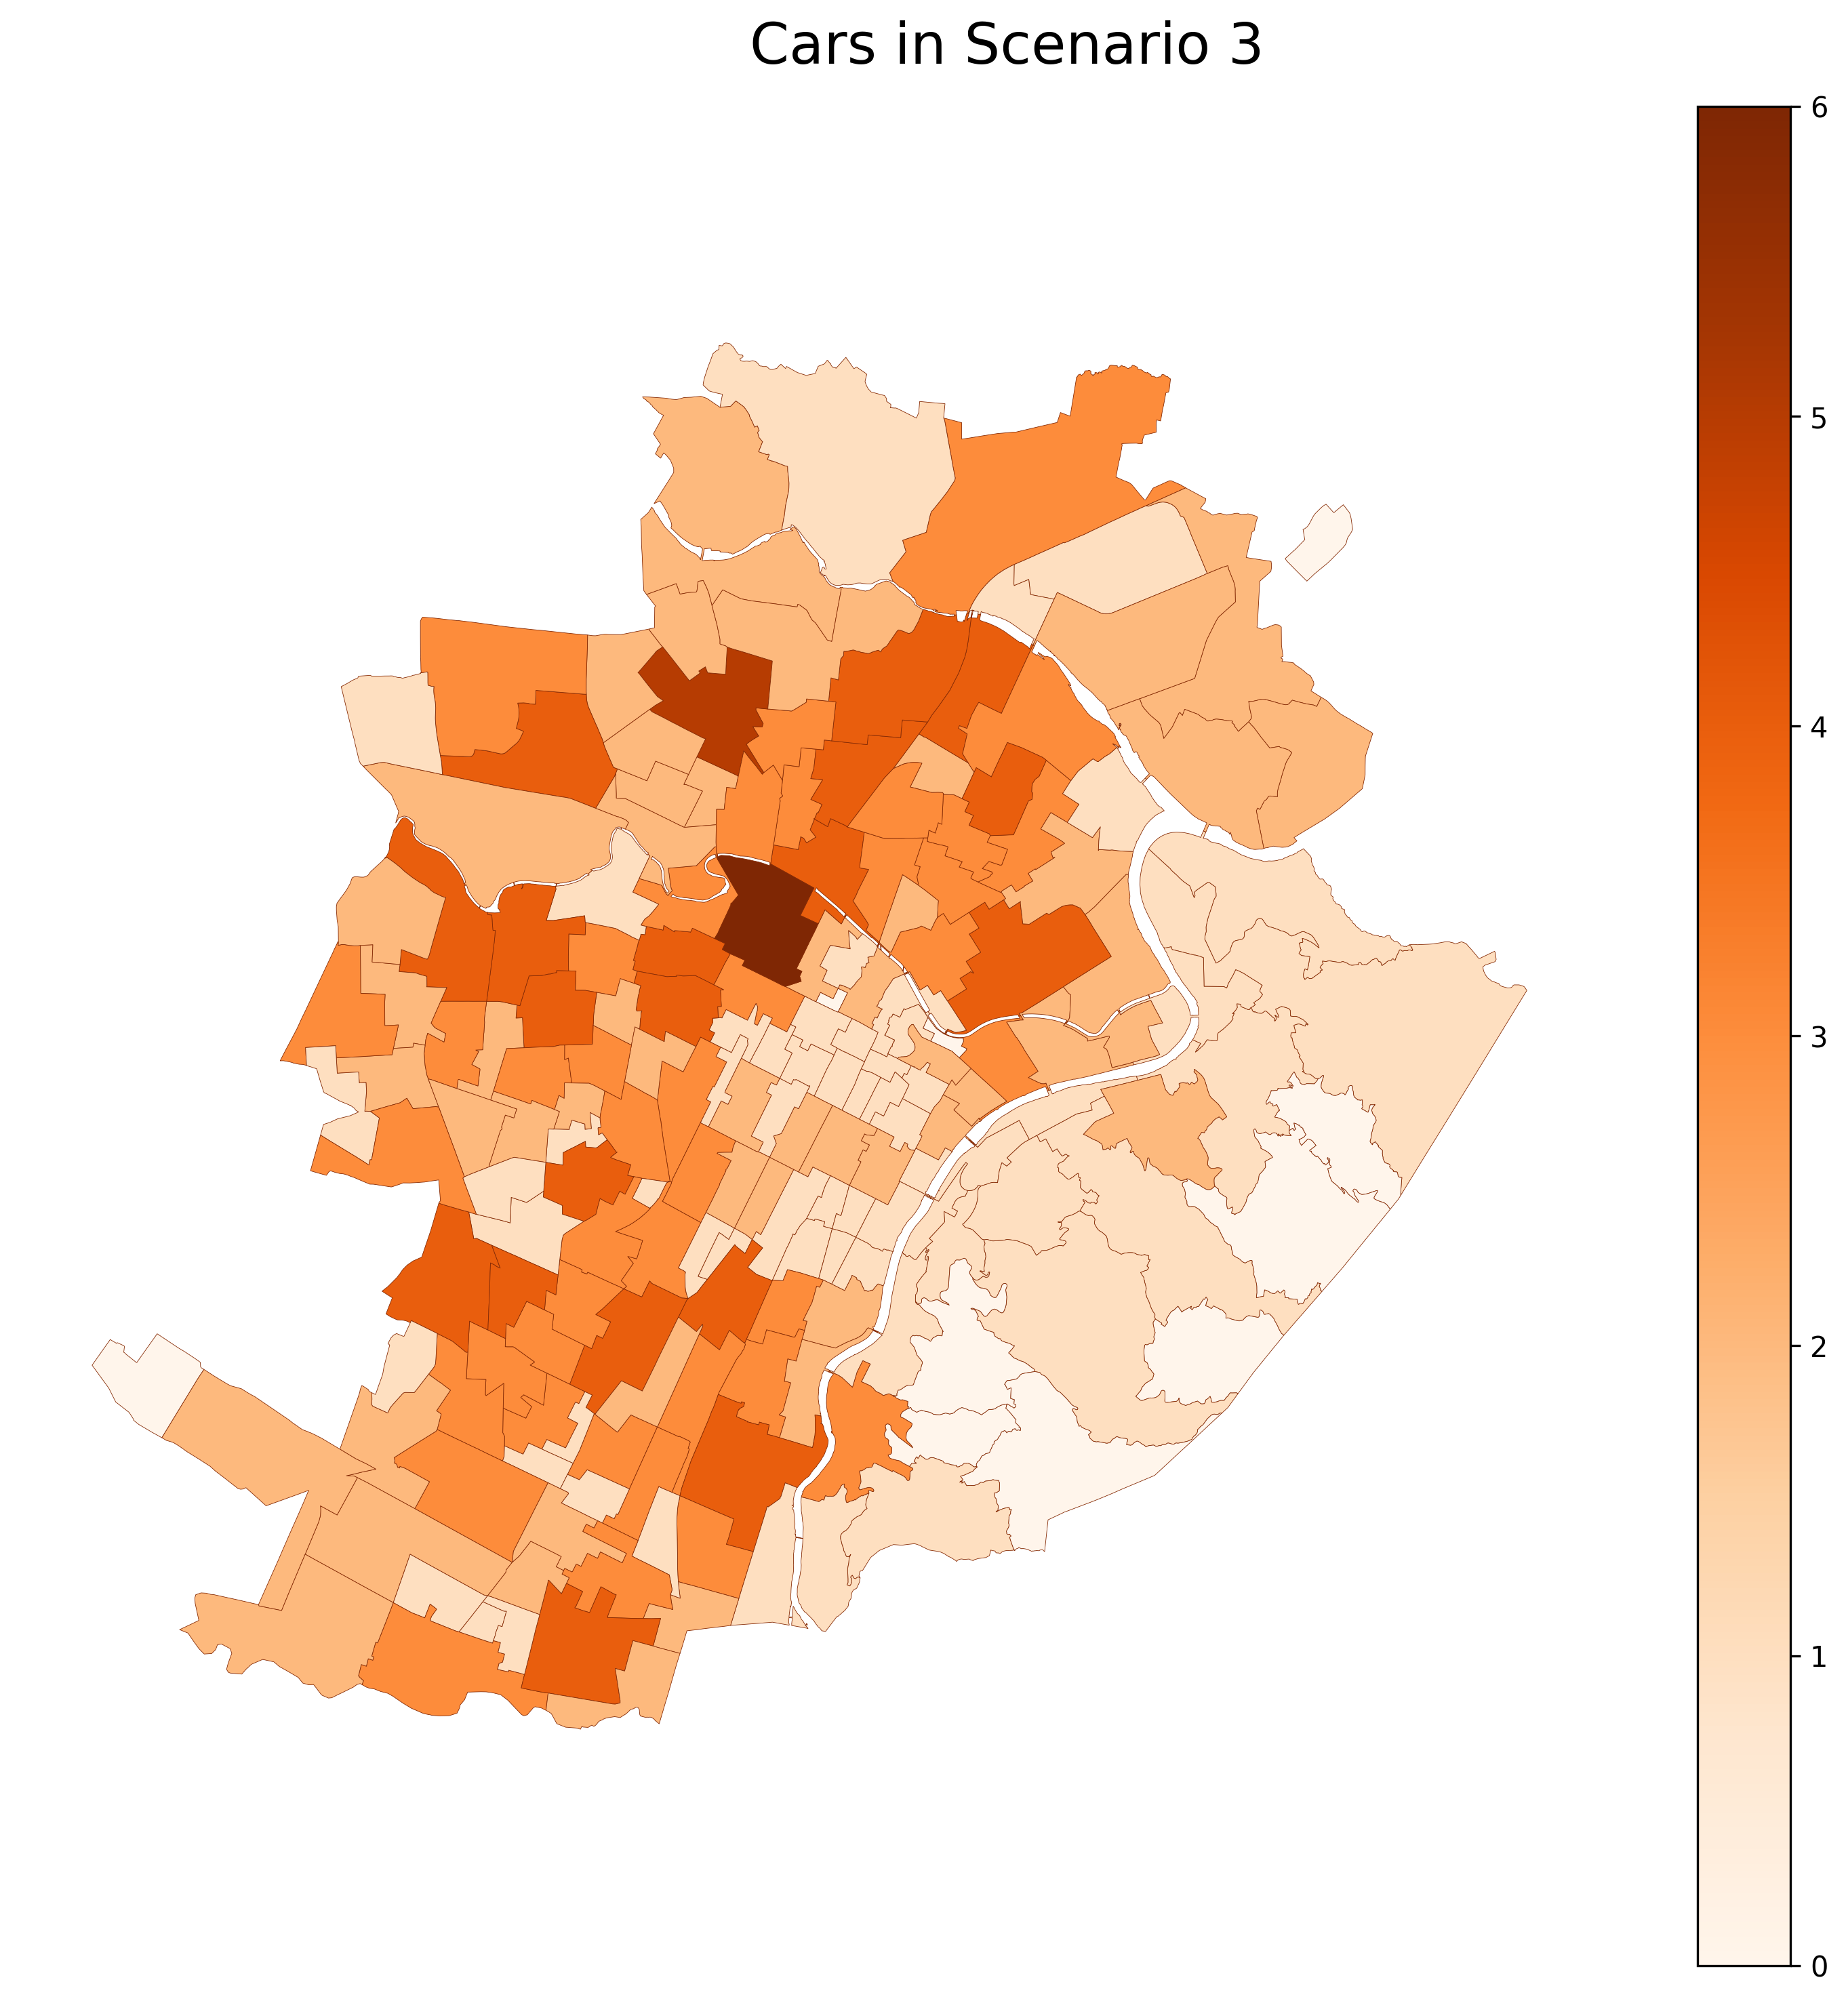

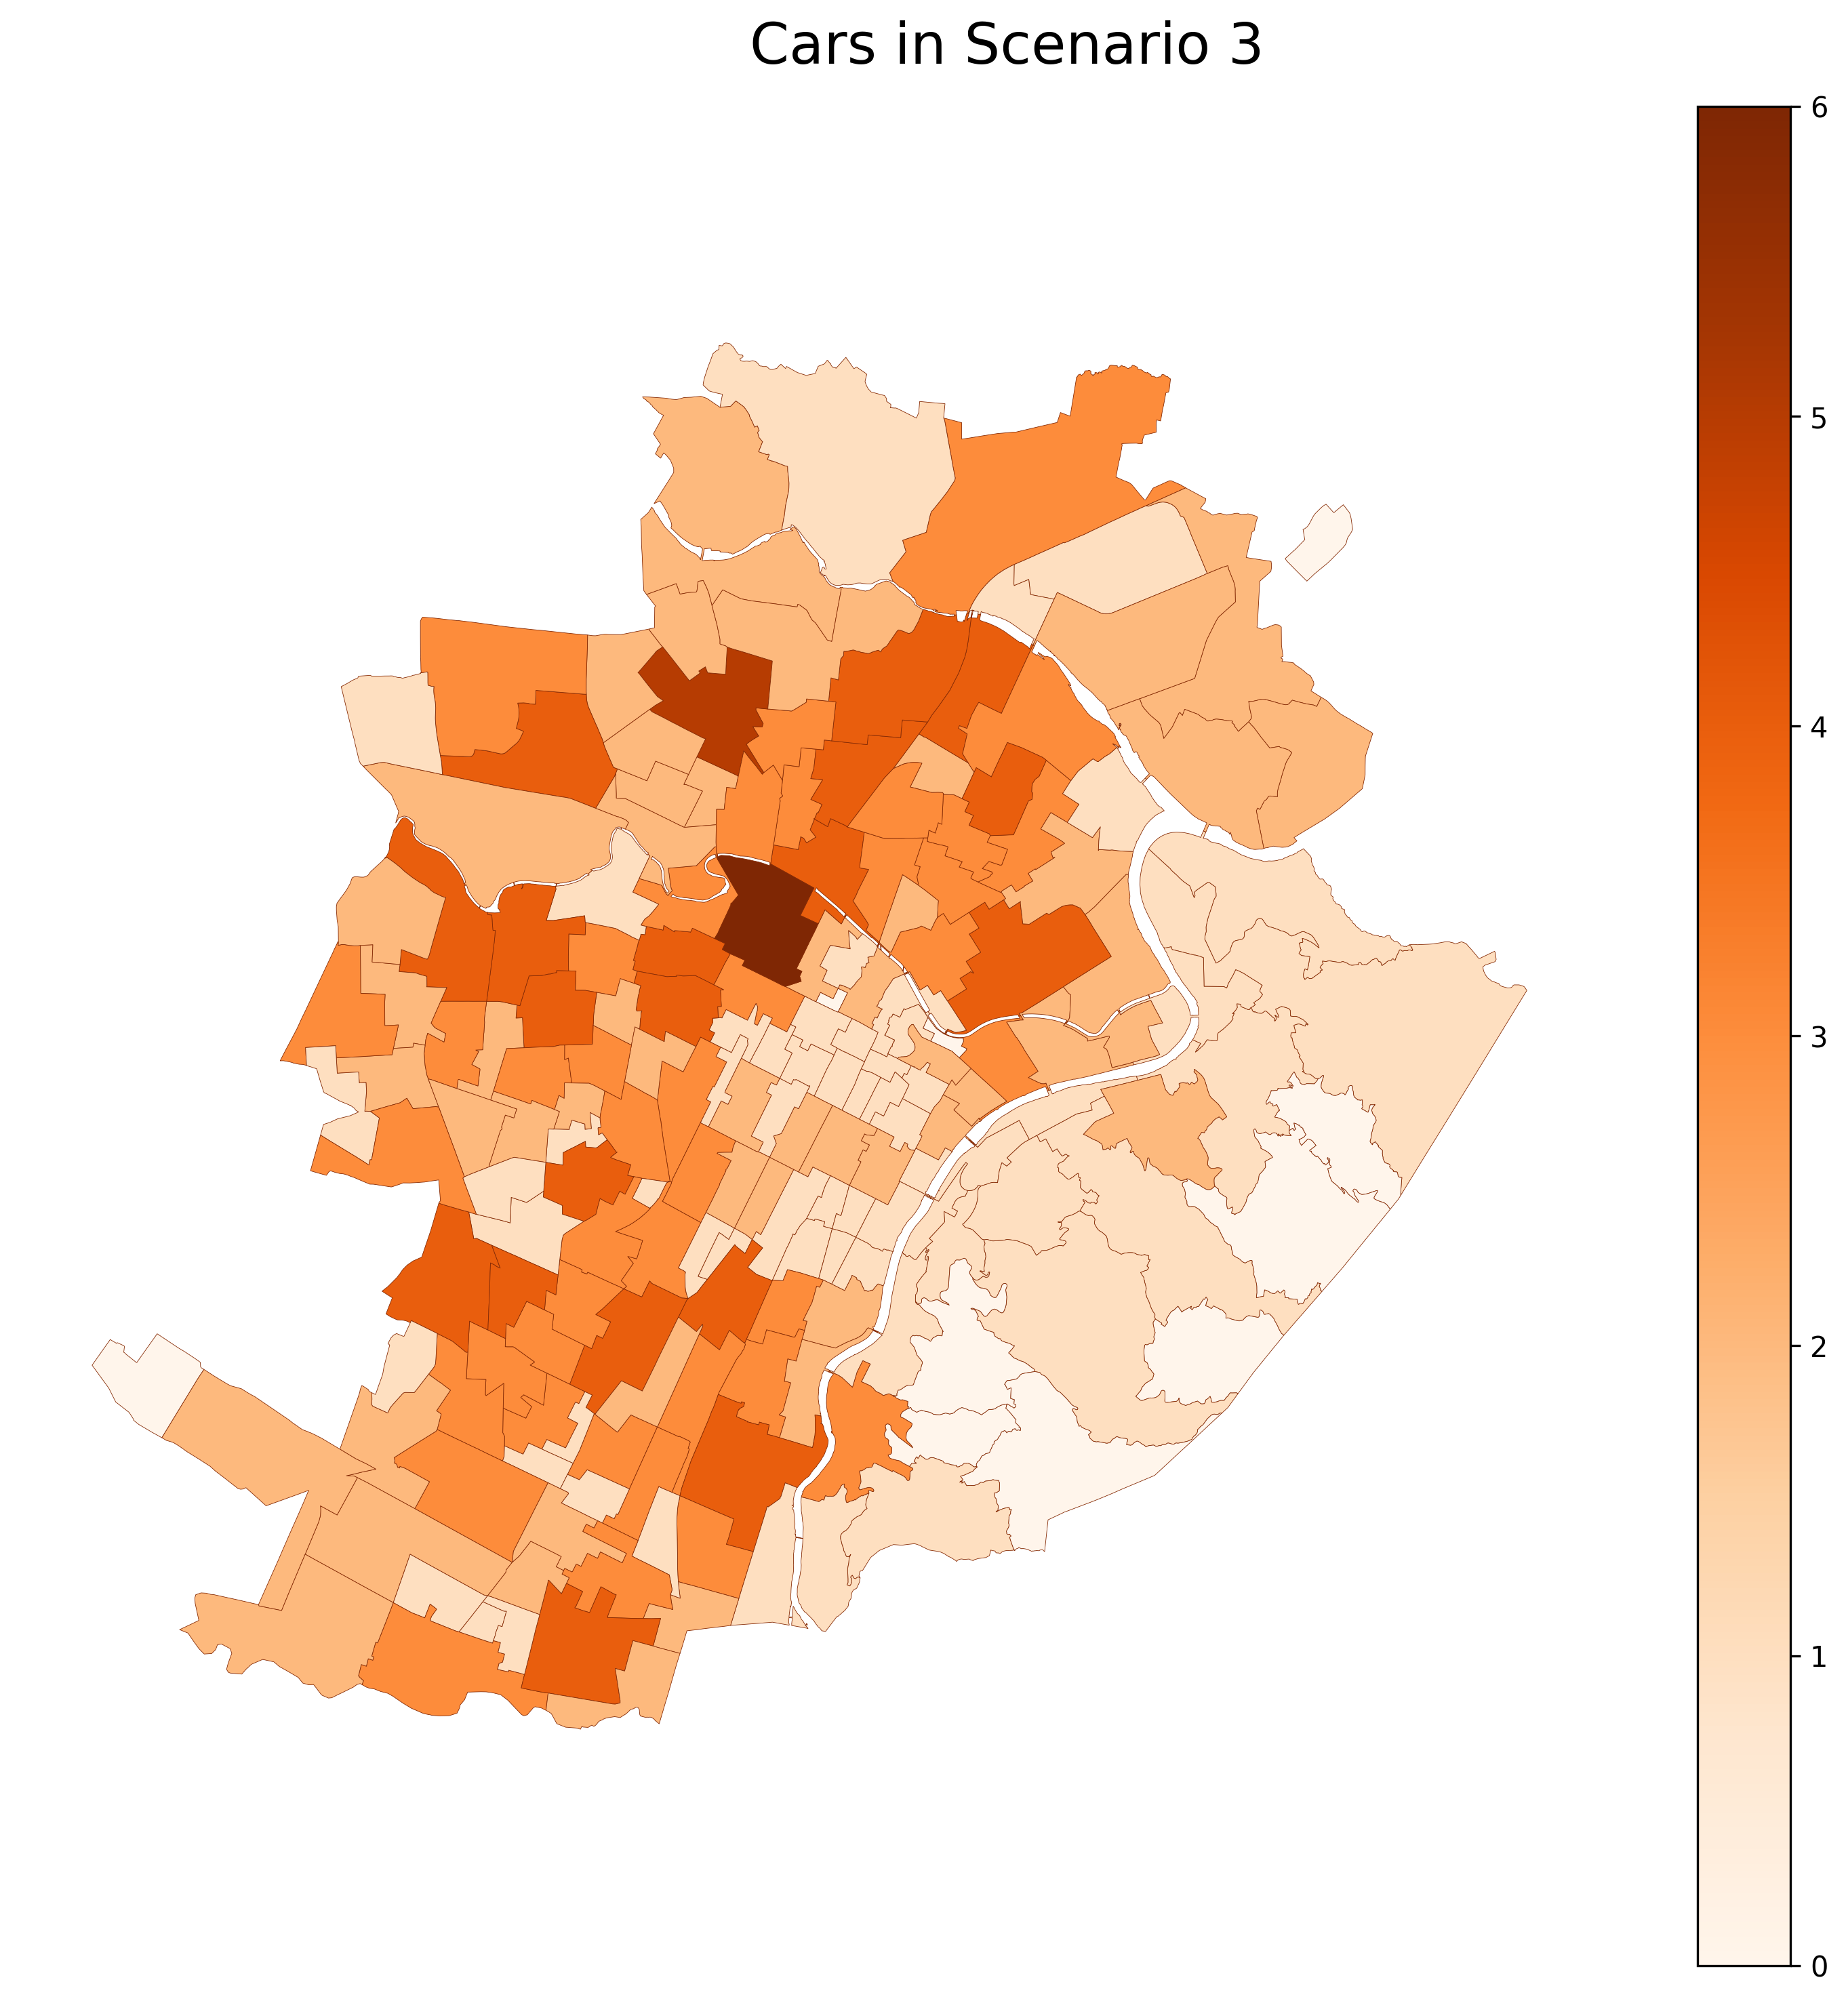

In [6]:
plot_column(gdf, day_column="cars_3",suptitle="Cars in Scenario 3", ticks=ticks_cars)

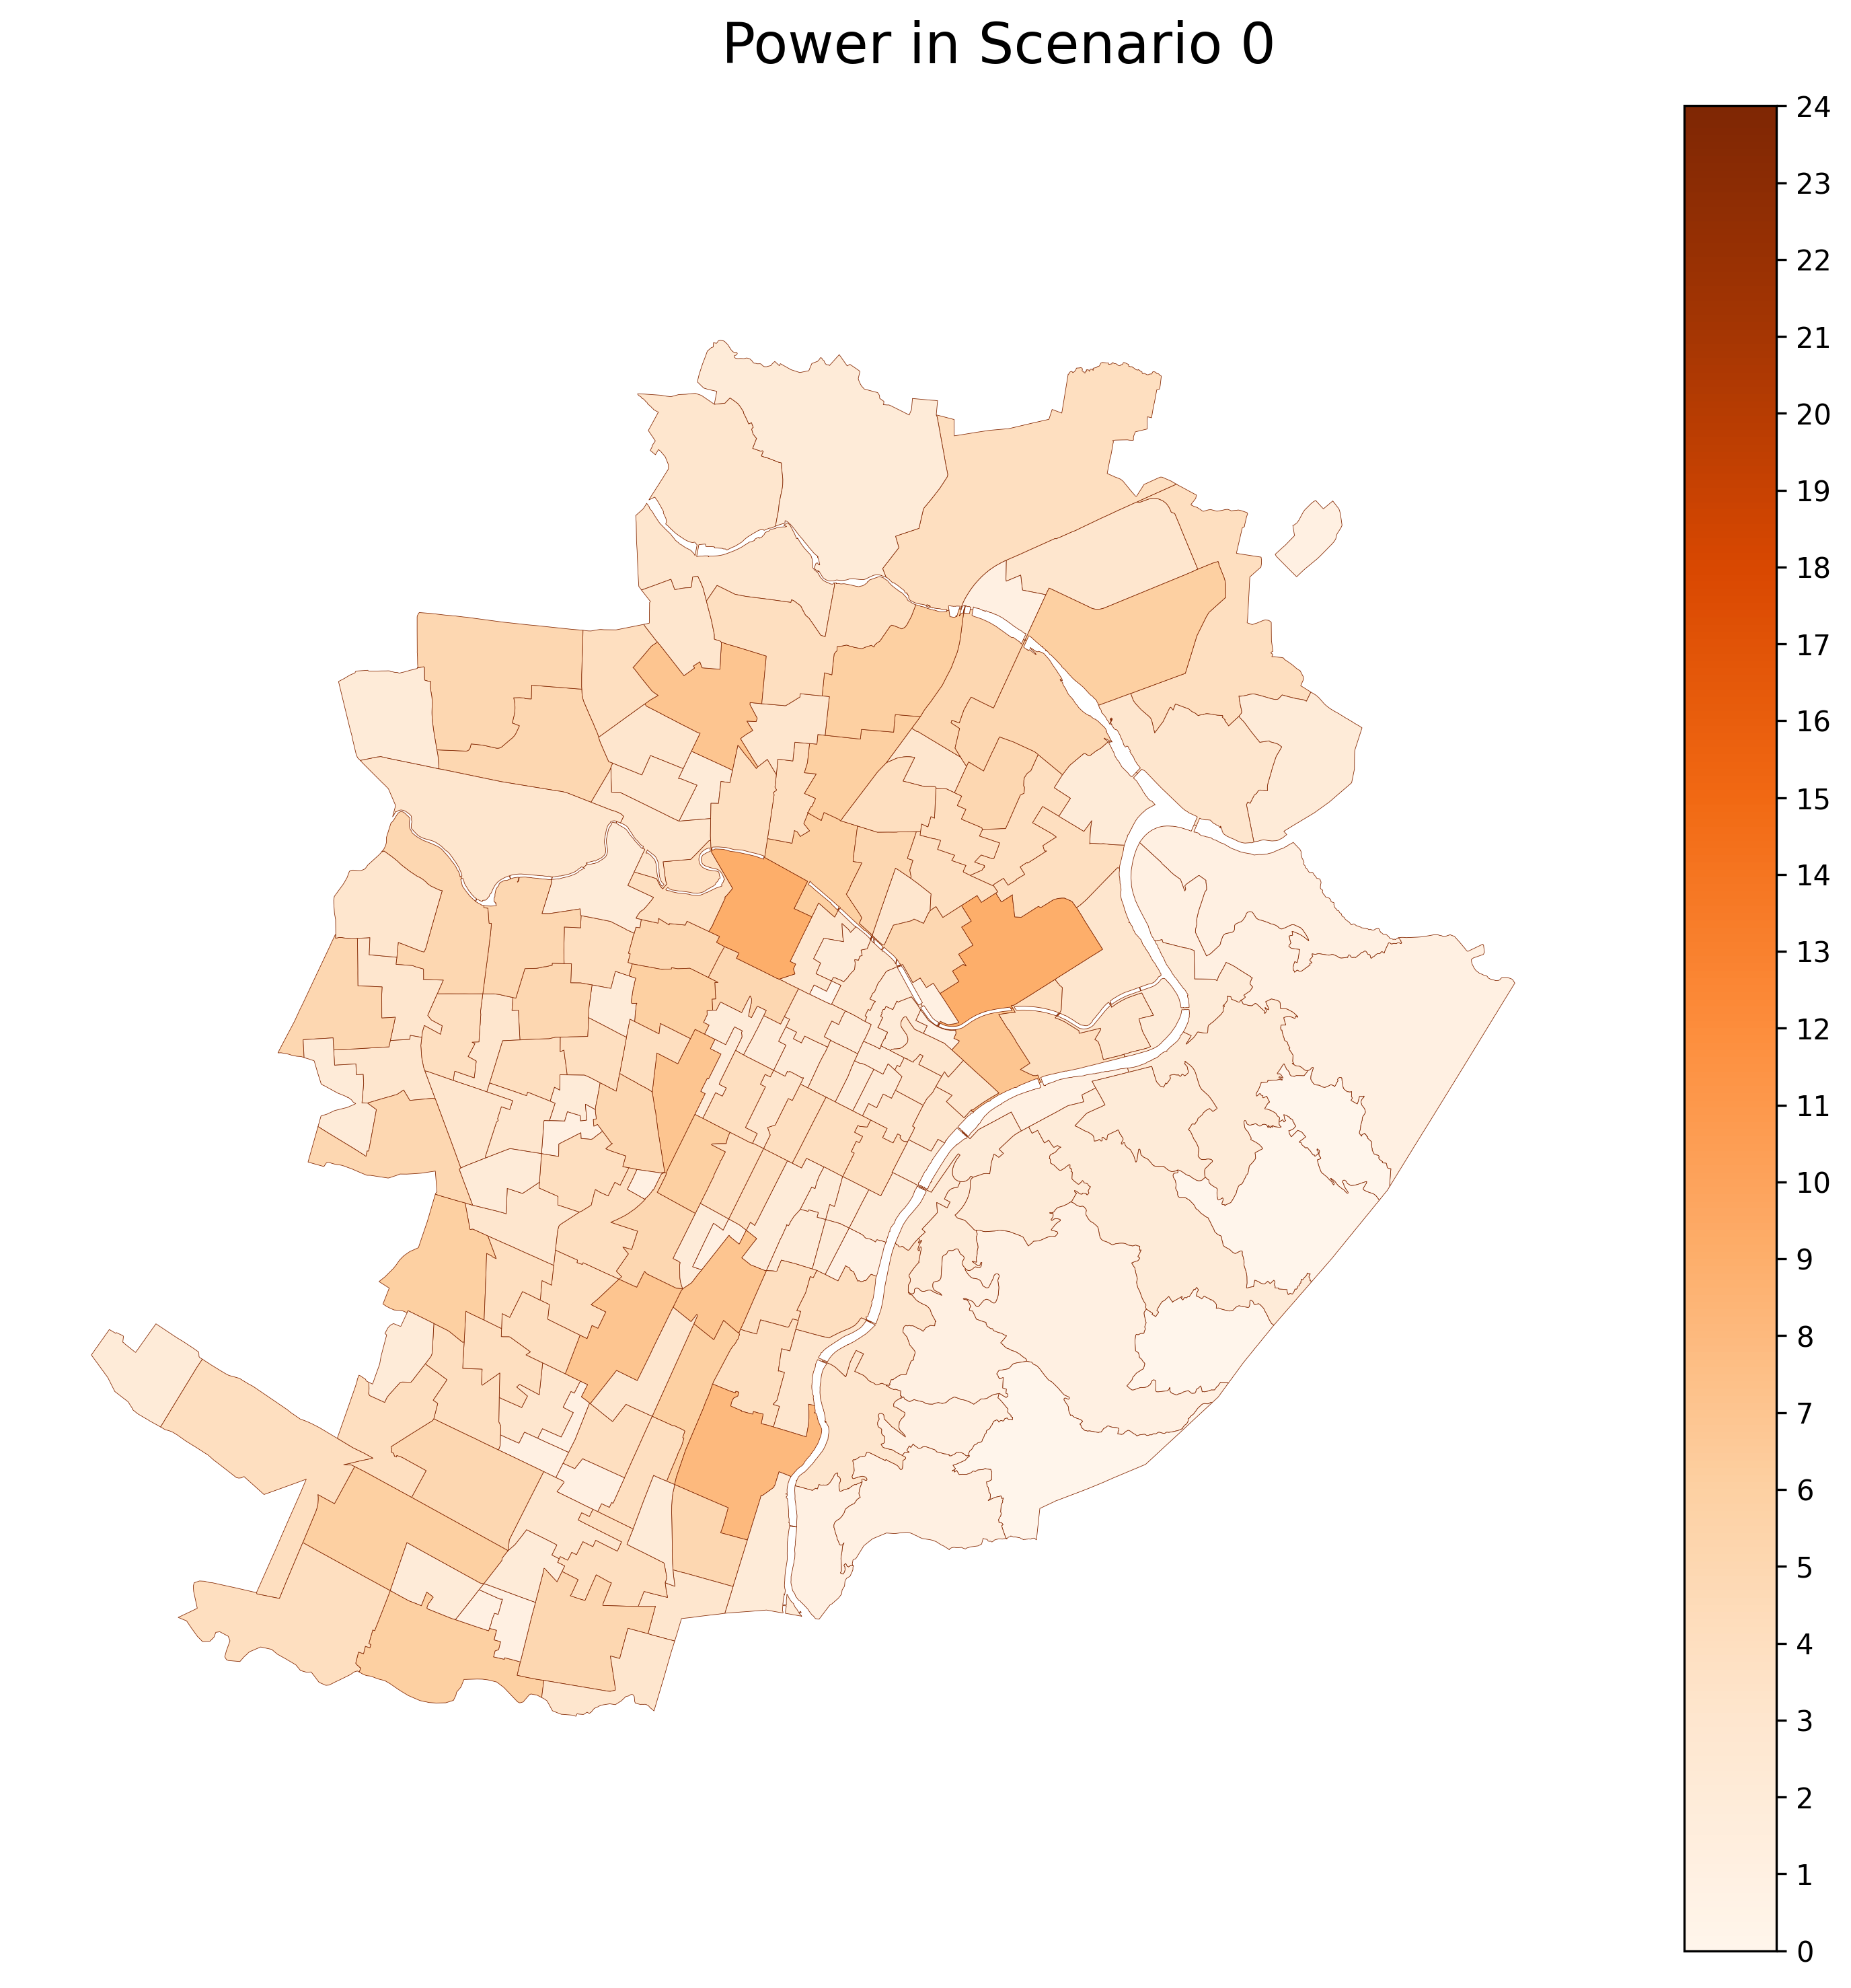

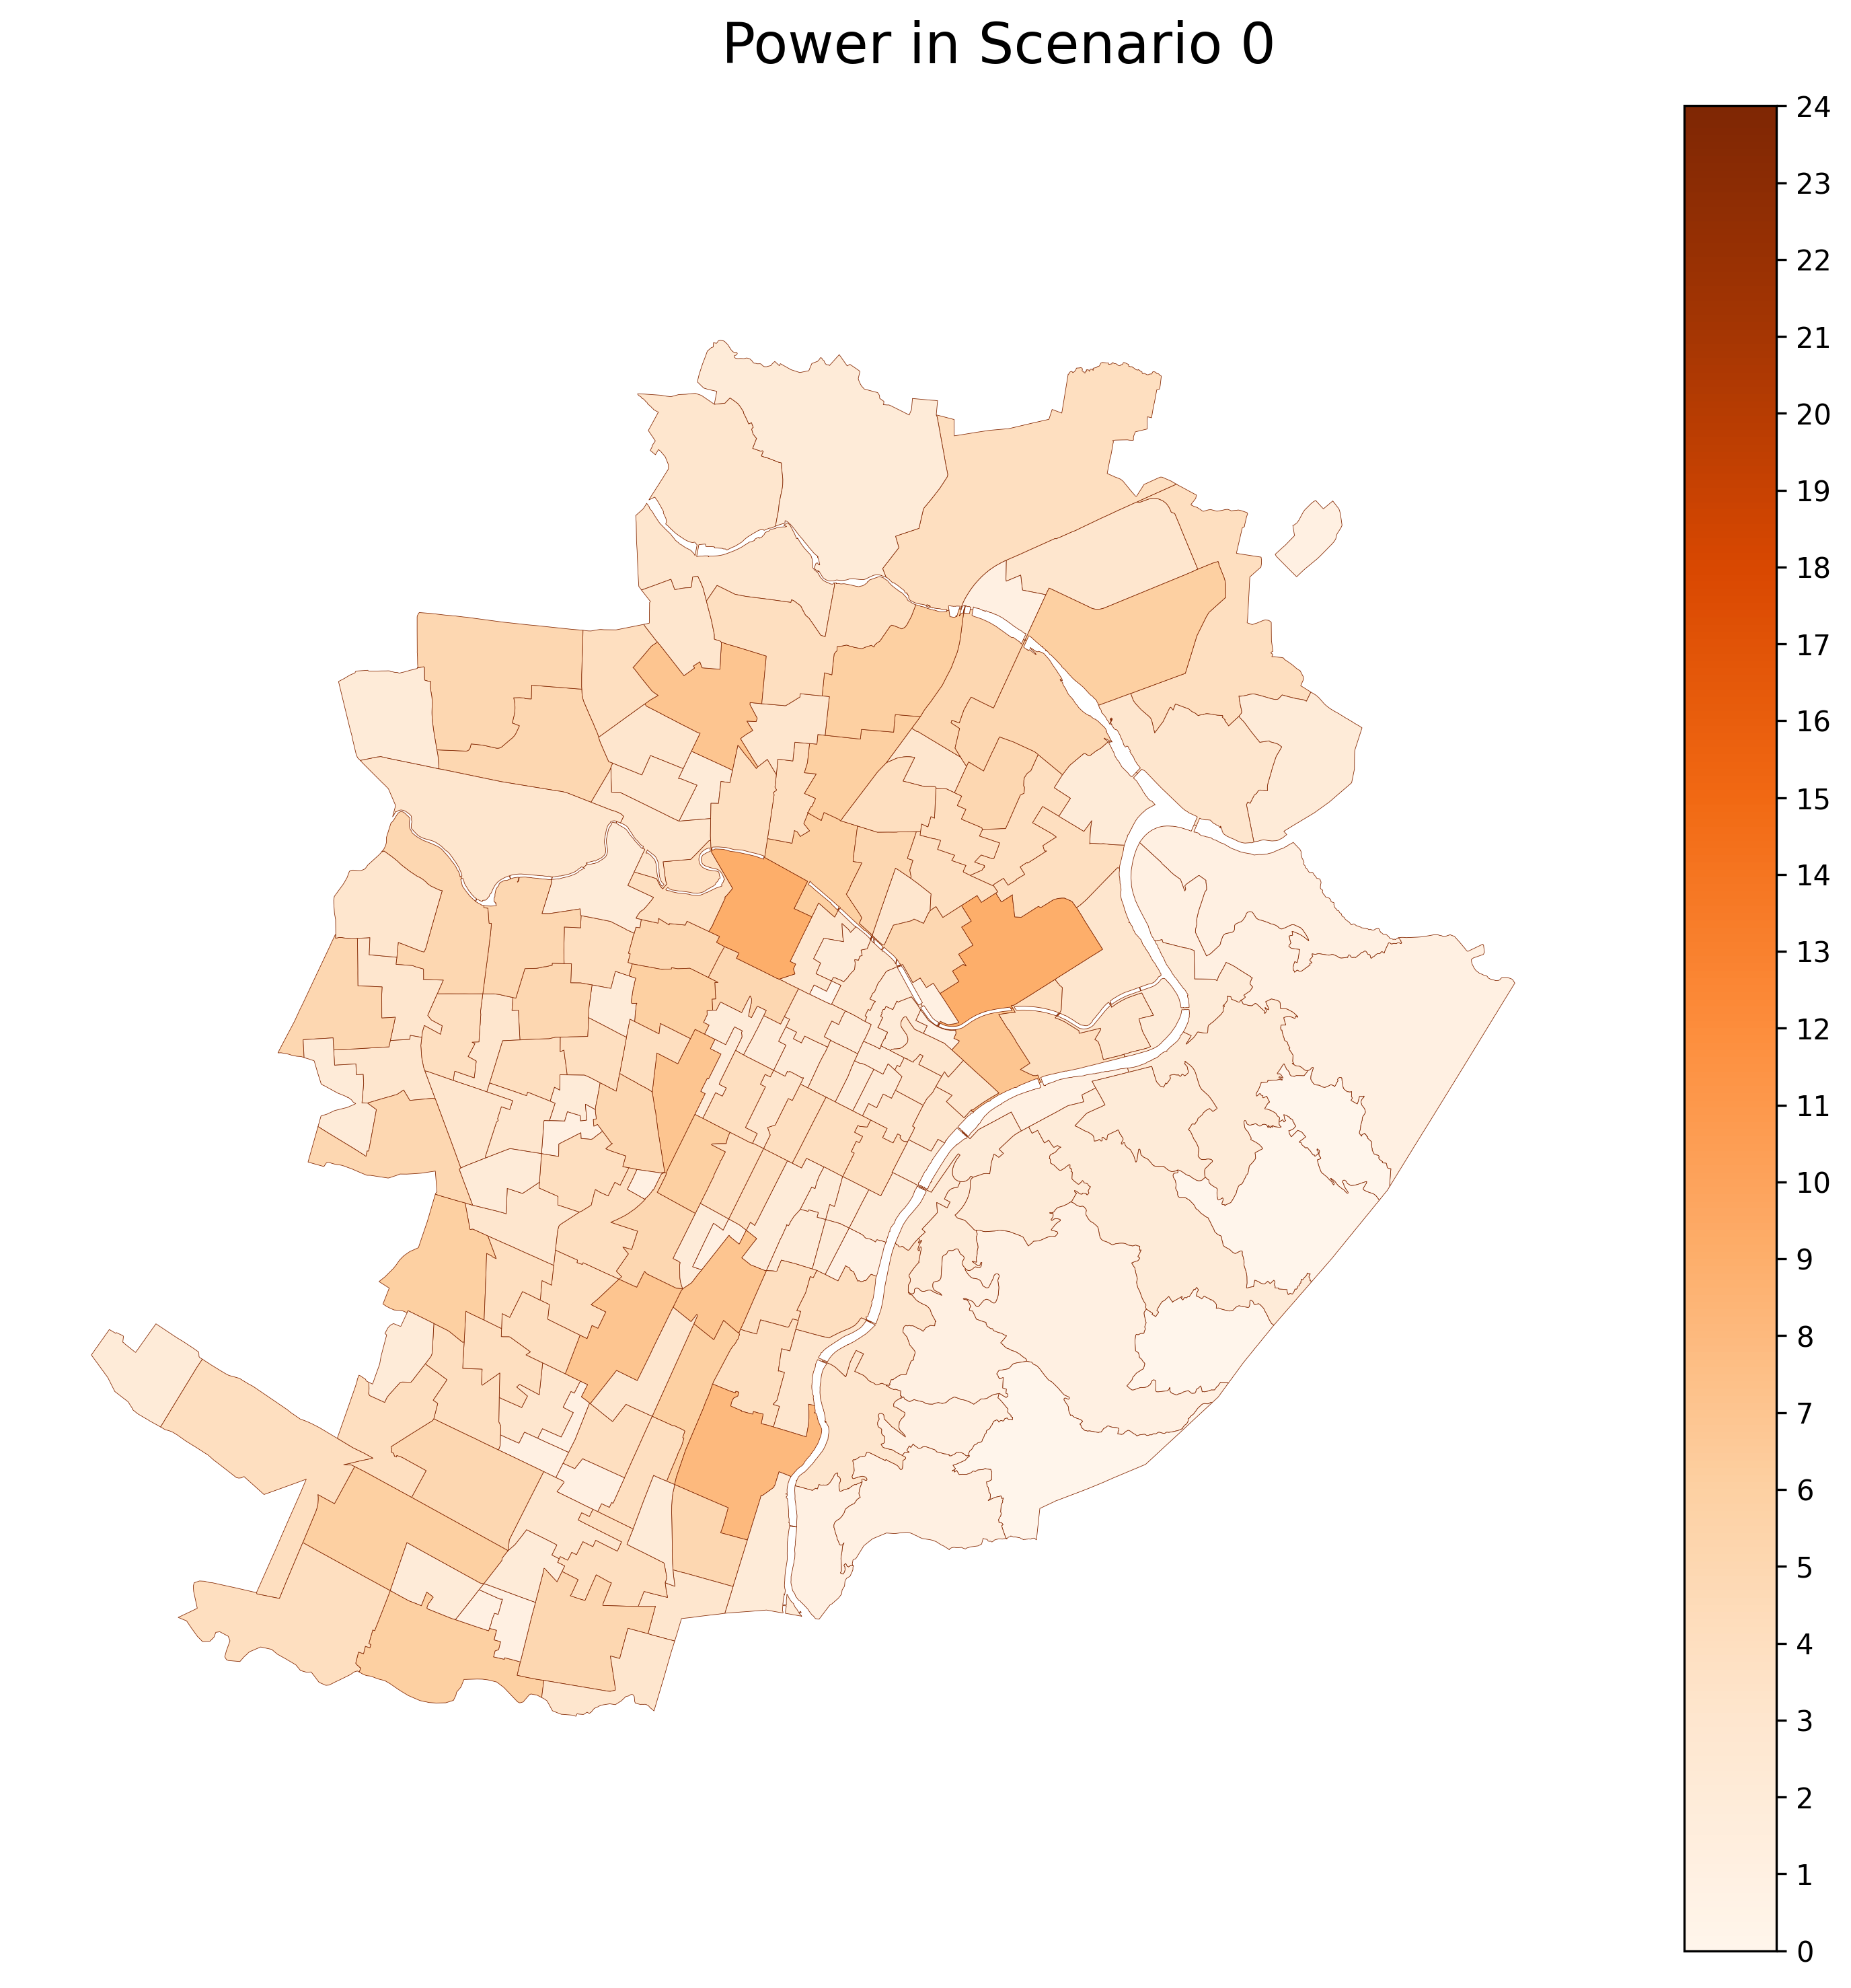

In [7]:
plot_column(gdf,day_column="power_0",suptitle="Power in Scenario 0", ticks=ticks_power)

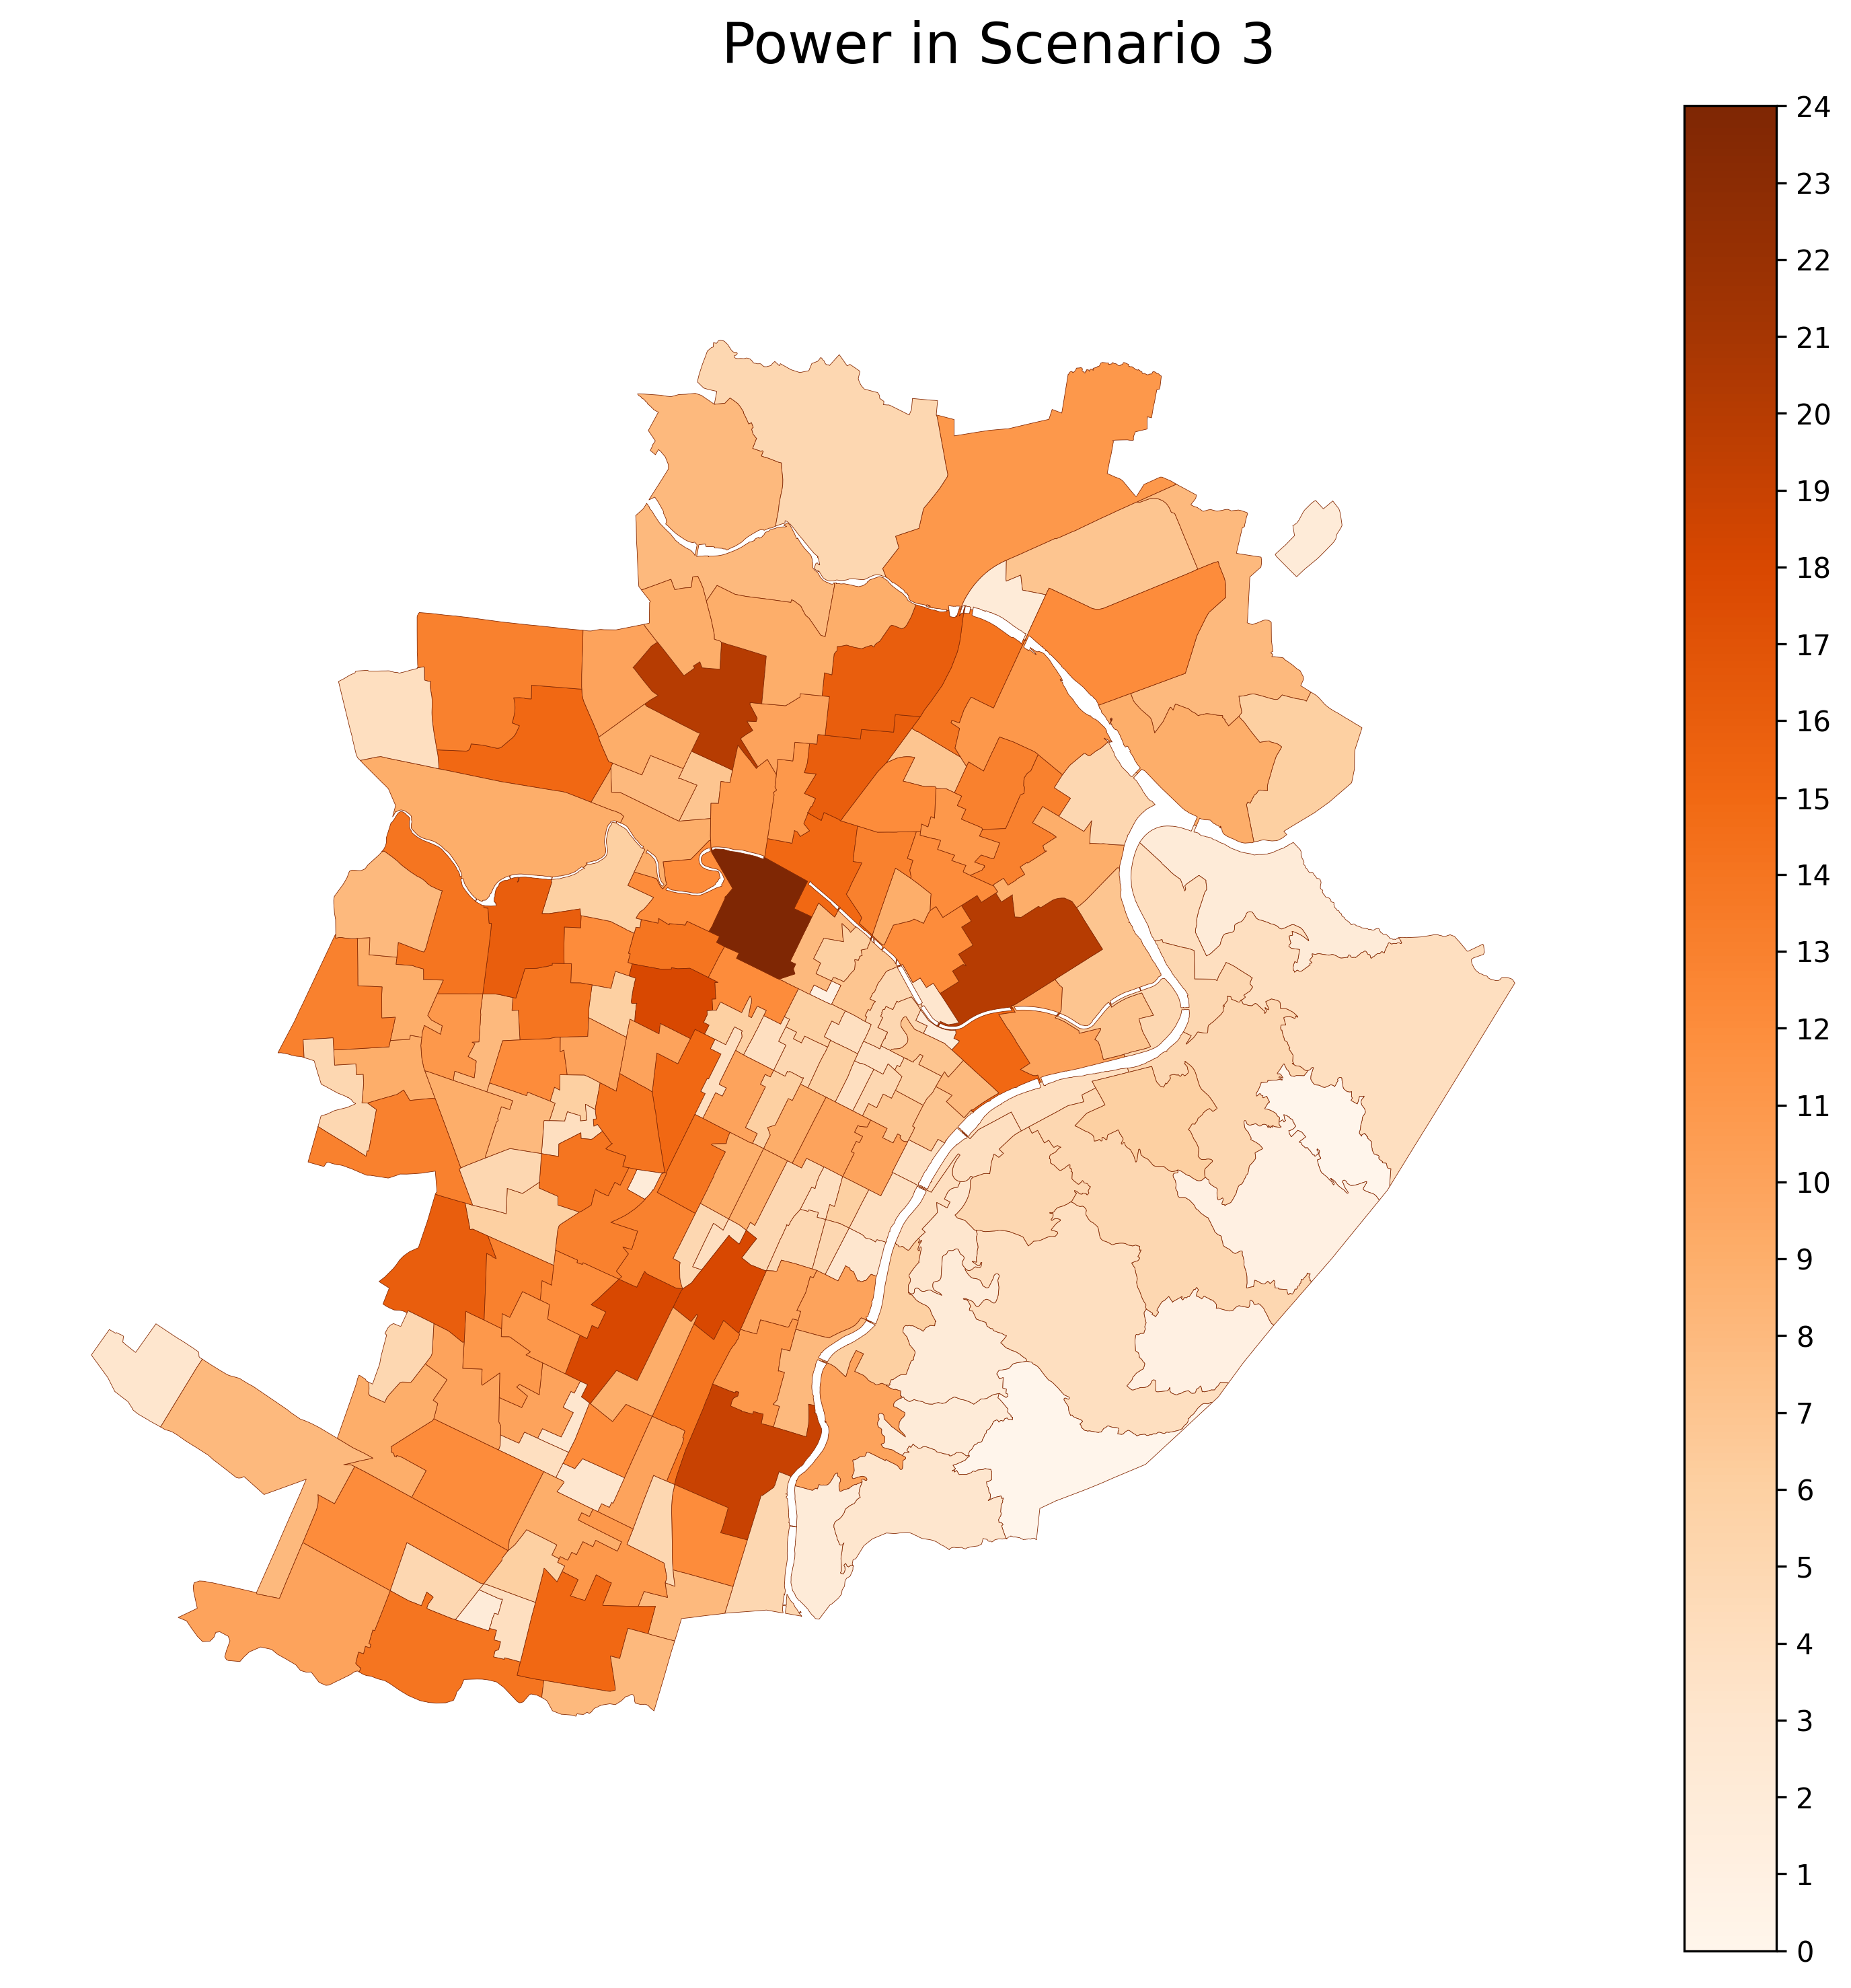

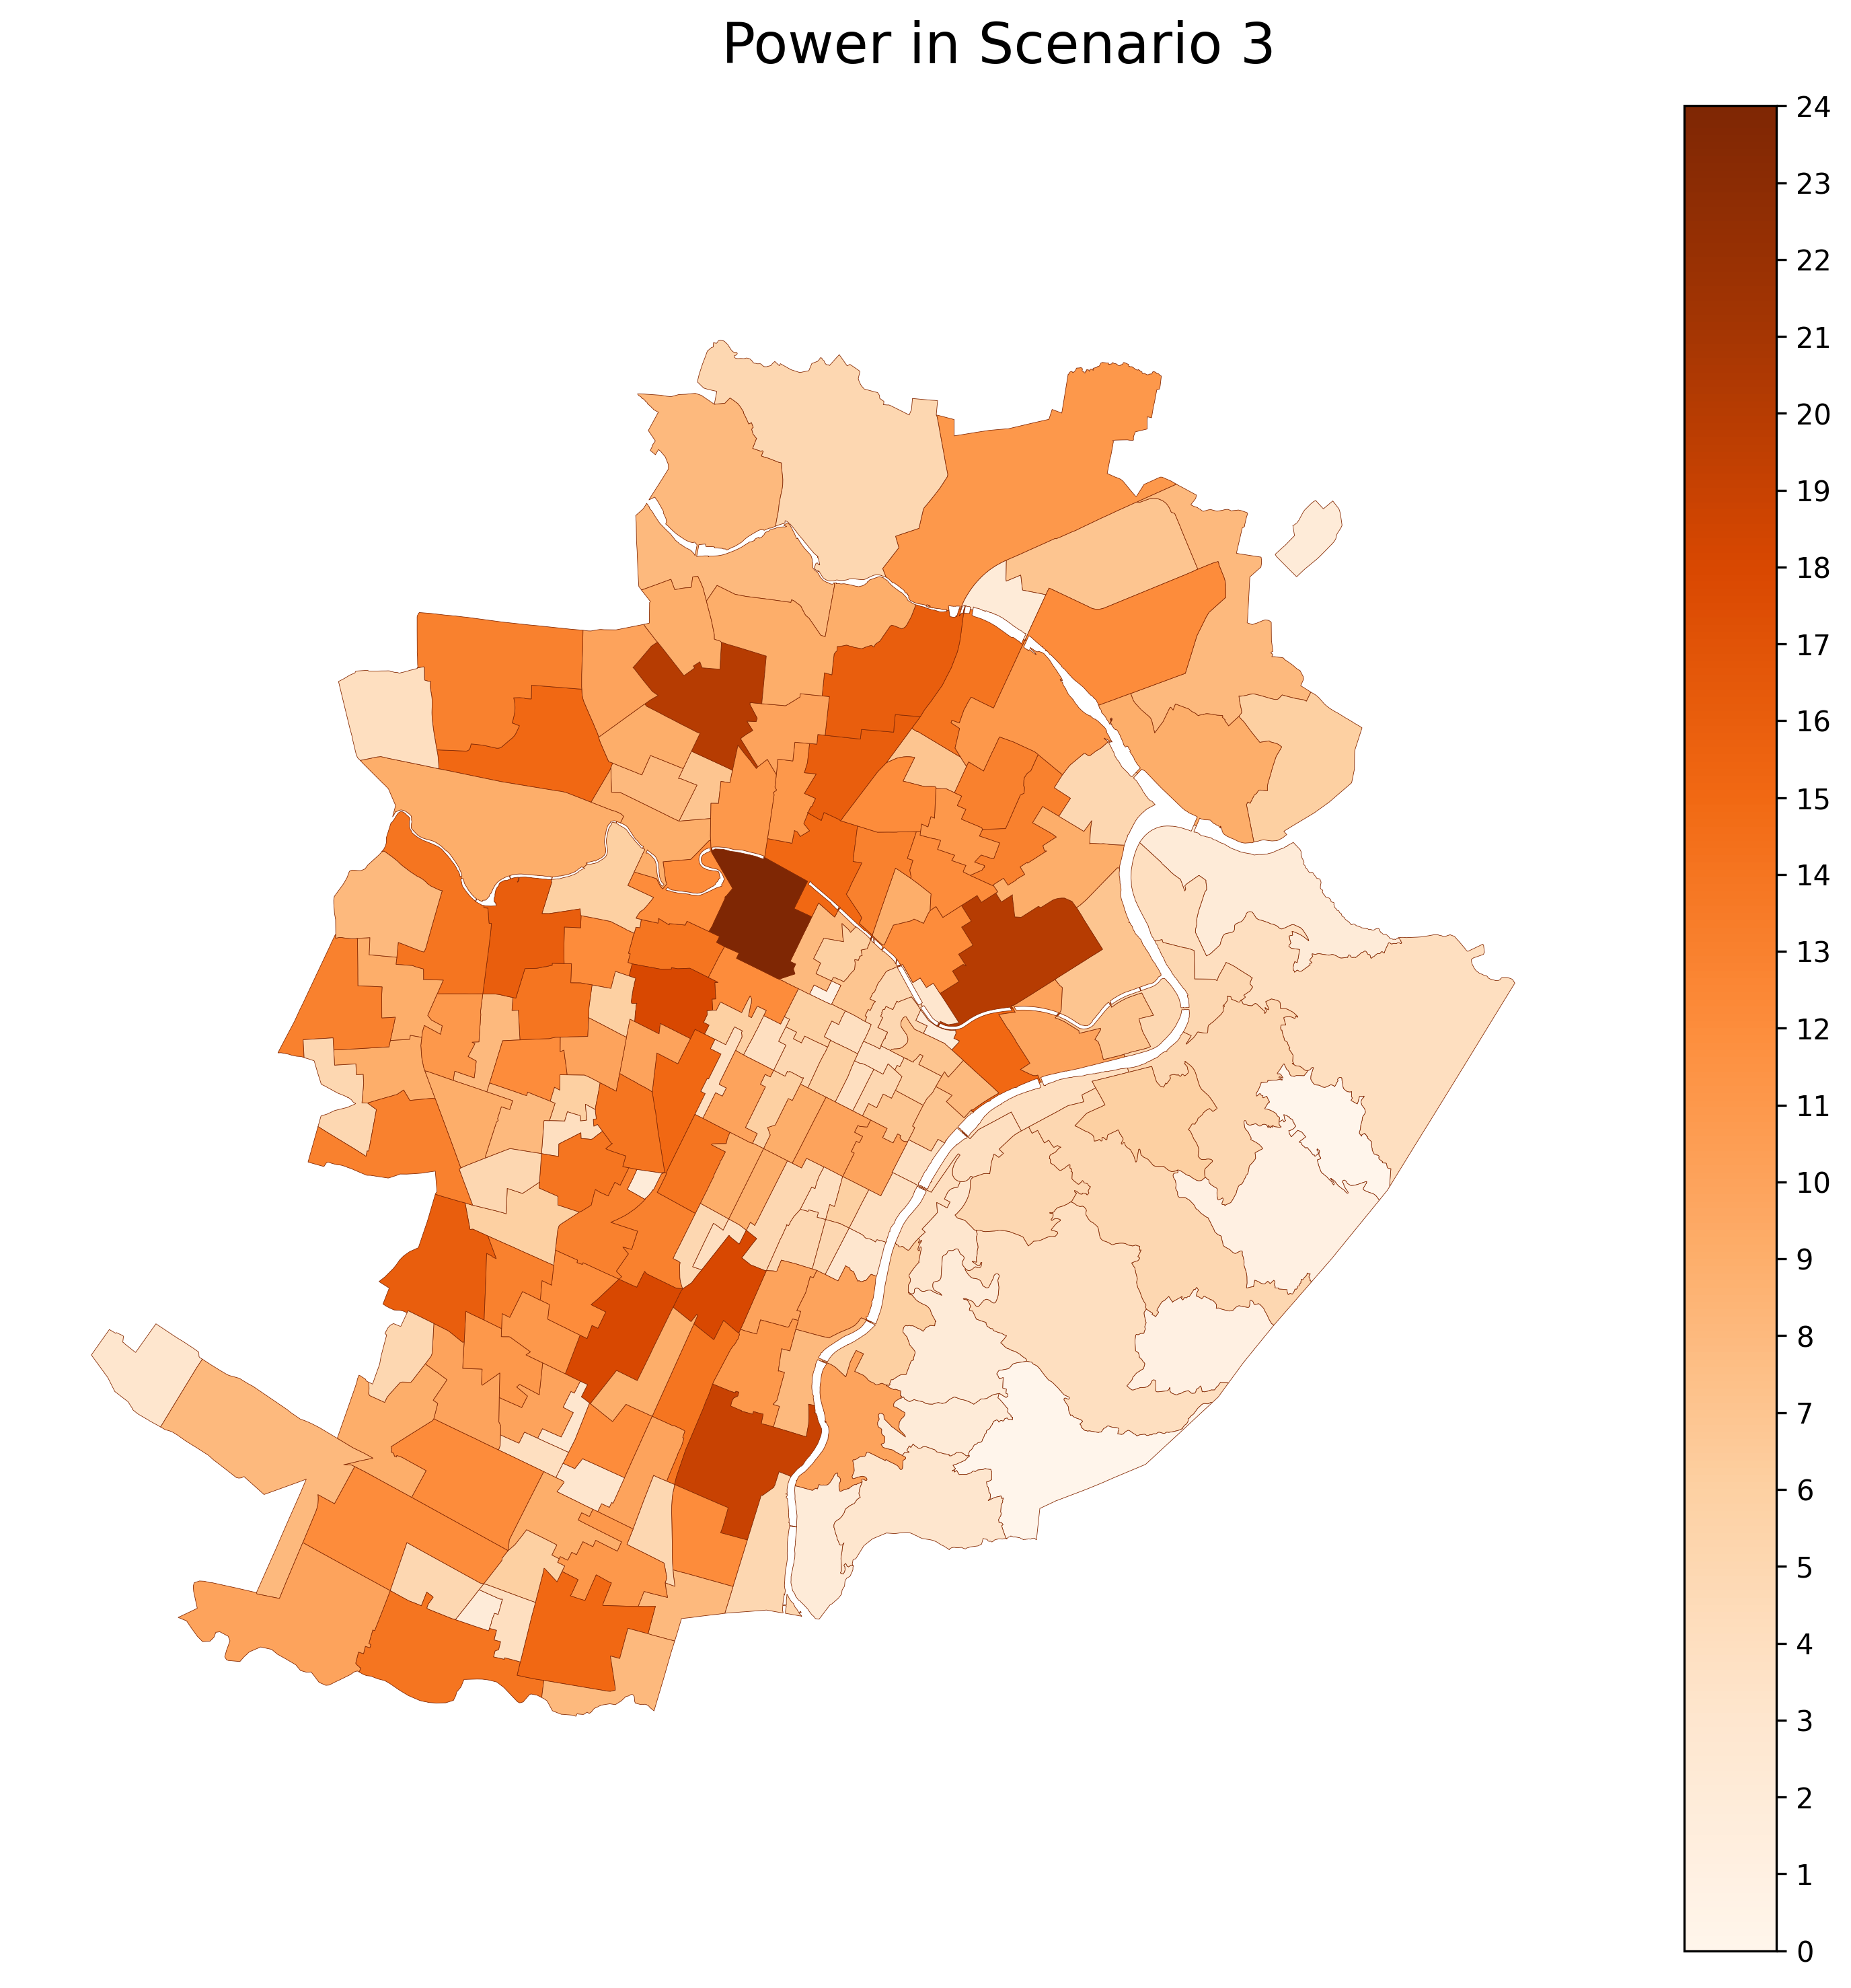

In [8]:
plot_column(gdf, day_column="power_3",suptitle="Power in Scenario 3", ticks=ticks_power)